Small Image Classification Using Convolutional Neural Network (CNN)

In this notebook, we will classify small images cifar10 dataset from tensorflow keras datasets.

In [18]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

Load the dataset

In [19]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [20]:
X_test.shape

(10000, 32, 32, 3)

Here we see there are 50000 training images and 1000 test images

In [21]:
y_train.shape

(50000, 1)

In [22]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

y_train is a 2D array, for our classification having 1D array is good enough. so we will convert this to now 1D array

In [23]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [24]:
y_test = y_test.reshape(-1,)
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

Let's plot some images to see what they are

In [25]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

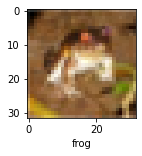

In [26]:
plot_sample(X_train, y_train, 0)

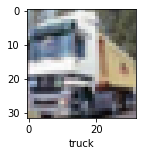

In [27]:
plot_sample(X_train, y_train, 1)

Normalize the images to a number from 0 to 1. Image has 3 channels (R,G,B) and each value in the channel can range from 0 to 255. Hence to normalize in 0-->1 range, we need to divide it by 255

Normalizing the training data

In [28]:
X_train = X_train / 255.0
X_test = X_test / 255.0

Build simple artificial neural network for image classification

In [29]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 109s 69ms/step - loss: 1.8138 - accuracy: 0.3528
Epoch 2/5
1563/1563 [==============================] - 103s 66ms/step - loss: 1.6239 - accuracy: 0.4260
Epoch 3/5
1563/1563 [==============================] - 102s 65ms/step - loss: 1.5415 - accuracy: 0.4554
Epoch 4/5
1563/1563 [==============================] - 103s 66ms/step - loss: 1.4826 - accuracy: 0.4750
Epoch 5/5
1563/1563 [==============================] - 103s 66ms/step - loss: 1.4345 - accuracy: 0.4954


You can see that at the end of 5 epochs, accuracy is at around 49%

In [30]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.65      0.42      0.51      1000
           1       0.78      0.24      0.36      1000
           2       0.32      0.46      0.38      1000
           3       0.37      0.09      0.15      1000
           4       0.41      0.41      0.41      1000
           5       0.29      0.59      0.39      1000
           6       0.58      0.40      0.47      1000
           7       0.48      0.62      0.54      1000
           8       0.72      0.50      0.59      1000
           9       0.43      0.71      0.54      1000

    accuracy                           0.44     10000
   macro avg       0.50      0.44      0.43     10000
weighted avg       0.50      0.44      0.43     10000



Now let us build a convolutional neural network to train our images

In [31]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [32]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [33]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 62s 40ms/step - loss: 1.4538 - accuracy: 0.4790
Epoch 2/10
1563/1563 [==============================] - 63s 40ms/step - loss: 1.1081 - accuracy: 0.6134
Epoch 3/10
1563/1563 [==============================] - 63s 40ms/step - loss: 0.9814 - accuracy: 0.6593
Epoch 4/10
1563/1563 [==============================] - 61s 39ms/step - loss: 0.9048 - accuracy: 0.6844
Epoch 5/10
1563/1563 [==============================] - 62s 40ms/step - loss: 0.8429 - accuracy: 0.7076
Epoch 6/10
1563/1563 [==============================] - 61s 39ms/step - loss: 0.7879 - accuracy: 0.7257
Epoch 7/10
1563/1563 [==============================] - 61s 39ms/step - loss: 0.7501 - accuracy: 0.7396
Epoch 8/10
1563/1563 [==============================] - 62s 40ms/step - loss: 0.7096 - accuracy: 0.7540
Epoch 9/10
1563/1563 [==============================] - 62s 40ms/step - loss: 0.6709 - accuracy: 0.7651
Epoch 10/10
1563/1563 [==============================] - 62s 40m

With CNN, at the end 5 epochs, accuracy was at around 70% which is a significant improvement over ANN. CNN's are best for image classification and gives superb accuracy. Also computation is much less compared to simple ANN as maxpooling reduces the image dimensions while still preserving the features

In [34]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 4s 12ms/step - loss: 0.9127 - accuracy: 0.7020


[0.9127132892608643, 0.7020000219345093]

In [35]:
y_pred = cnn.predict(X_test)
y_pred[:5]

array([[1.0916310e-04, 2.1082151e-04, 1.9650576e-03, 7.7641720e-01,
        3.0749242e-04, 1.7894721e-01, 1.9531885e-02, 5.8164209e-05,
        2.2336613e-02, 1.1638607e-04],
       [2.8118458e-02, 1.7362197e-01, 1.7994537e-07, 3.3430041e-07,
        5.0929323e-08, 2.1188628e-08, 4.8102389e-10, 2.4882945e-06,
        7.9749197e-01, 7.6457363e-04],
       [2.1771215e-01, 1.3155867e-01, 1.8471774e-03, 2.7998709e-03,
        6.7767699e-04, 1.7633144e-04, 2.1446410e-03, 1.0421787e-03,
        4.3646887e-01, 2.0557241e-01],
       [9.2672753e-01, 7.7040223e-03, 1.9495528e-02, 3.0263532e-03,
        1.2815577e-02, 7.6457352e-04, 5.1012586e-05, 3.2981668e-04,
        2.7663557e-02, 1.4219161e-03],
       [1.9935408e-06, 8.4371386e-06, 4.6170179e-02, 8.7430120e-02,
        5.1329833e-01, 5.6725009e-03, 3.4701657e-01, 1.2114278e-06,
        3.9860420e-04, 2.0816831e-06]], dtype=float32)

In [36]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 4]

In [37]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

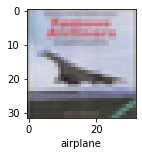

In [38]:
plot_sample(X_test, y_test,3)

In [39]:
classes[y_classes[3]]

'airplane'

In [40]:
classes[y_classes[3]]

'airplane'